$$ {\huge \text{ Disciplina: Logica Fuzzy }}\\  \\  \text{ Cap 8 - Simulações em Sistemas Fuzzy }\\
\ \  \ \ \ \ 
\\
 { \it  \text{ Discente: Prof. Dr. João Fernando }  }
 \\
\text{ Monitor: Arnaldo Araújo} \\
\text{ Mestrado e Doutorado em Ciências da Computação - UFC }$$


# Exemplo 8.2

<img src="Images/cap8-1.png">

In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 

In [127]:
x1 = ctrl.Antecedent(np.arange(-180,181,1), 'x1')
y = ctrl.Consequent(np.arange(-10,11,1), 'y')

## VARIÁVEIS DO SISTEMA

<img src="Images/cap8-2.png">

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


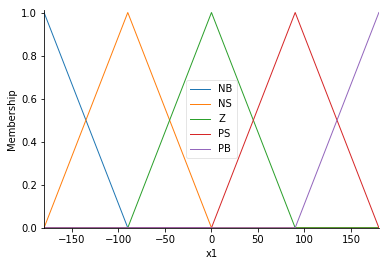

In [128]:
rotulosX = ['NB', 'NS', 'Z', 'PS', 'PB']
x1.automf(names=rotulosX)
x1.view()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


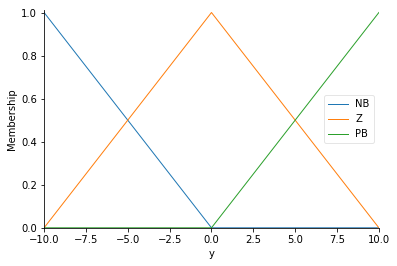

In [129]:
rotulosY = ['NB','Z','PB']
y.automf(names=rotulosY)
y.view()

### Também é possível settar os valores manualmente.
$$\large{Exemplo}\\ x1['NB'] = fuzz.trimf(x1.universe, [-180, -180, -90])
$$


## AGORA VAMOS DEFINIR AS REGRAS

<img src="Images/cap8-3.png">

In [130]:
rule1 = ctrl.Rule(antecedent=( x1['Z'] | x1['PB']),consequent=y['Z'],label='rule1' )
rule2 = ctrl.Rule(antecedent= x1['PS'] ,consequent=y['PB'],label='rule2' )
rule3 = ctrl.Rule(antecedent= ( x1['Z'] | x1['NB']),consequent=y['Z'],label='rule3' )
rule4 = ctrl.Rule(antecedent= x1['NS'] ,consequent=y['NB'],label='rule4' )



In [131]:
#crio o sistema de regras
system_regras = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4])


In [132]:
#crio o sistema de inferência
system = ctrl.ControlSystemSimulation(system_regras)

$$\large{\text{VAMOS AGORA REALIZAR A INFERÊNCIA PARA AS SEGUINTES ENTRADAS}}\\$$
$$\large{\text{x1 ={-180, −135, −45, 0, 45, 135, 180}}}$$

3.27515792264e-16


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


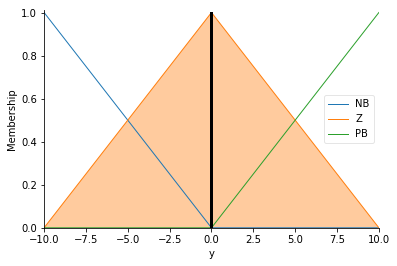

In [133]:
system.input['x1'] = -180 
system.compute()
print(system.output['y'])
y.view(sim=system)

-1.19047619048


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


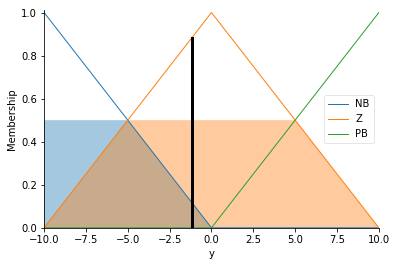

In [134]:
system.input['x1'] = -135 
system.compute()
print(system.output['y'])
y.view(sim=system)

In [135]:
saida0 = list()
vx1 =[-180, -135, -45, 0, 45, 135, 180]
for k0 in vx1:
    system.input['x1'] = k0
    system.compute()
    saida0.append(system.output['y'])
saida0 = np.asarray(saida0)

    

In [150]:
saida0

array([  3.27515792e-16,  -1.19047619e+00,  -1.19047619e+00,
         3.27515792e-16,   1.19047619e+00,   1.19047619e+00,
         3.27515792e-16])

In [136]:
saida = list()
for k in x1.universe:
    system.input['x1'] = k
    system.compute()
    saida.append(system.output['y'])
saida = np.asarray(saida)


In [ ]:
saidaF = list()
for k1 in vx1:
    S = 10*(np.sin(k1))
    system.compute()
    saidaF.append(system.output['y'])
saidaF = np.asarray(saidaF)


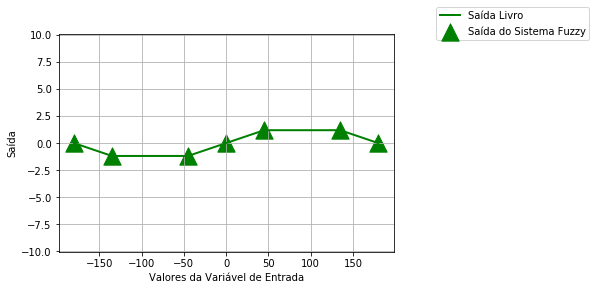

In [152]:
S = 10*(np.sin(vx1))
fig,ax = plt.subplots()
#saida fuzzy para todos os valors
#ax.plot(x1.universe,saida,'r--',linewidth=3,label= 'Saída Real Sistema Fuzzy')
ax.scatter(vx1,saida0,s=300, marker='^', c='g',label='Saída do Sistema Fuzzy')
ax.plot(vx1,saida0,'g-', linewidth=2,label='Saída Livro')
#saida real para 10*(sen(x))
#ax.scatter(vx1,S,s=300, marker='.', c='m',label='Saída da Função Real')
#saida real para 10*(sen(x)) para todos os valores
#ax.plot(vx1,S,'m-',linewidth = 2,label='Saída da Função Real')

#ax.plot(x1.universe,saidaReal,'g-',linewidth=3,label= 'Saída Sistema')
ax.set_ylabel('Saída')
ax.set_xlabel('Valores da Variável de Entrada')
ax.set_ylim(-10.05, 10.05);
ax.grid(True)
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()



# Exemplo 8.3

<img src="Images/exem8131.png">

<img src="Images/exem8132.png">

<img src="Images/exem8133.png">

<img src="Images/exem8134.png">

In [57]:
x = ctrl.Antecedent(np.arange(-1, 2, 1), 'x')
y = ctrl.Consequent(np.arange(0, 13, 1), 'y')

In [58]:
x['NB'] = fuzz.trimf(x.universe, [-1, -1, -0.5])
x['NS'] = fuzz.trimf(x.universe, [-1, -0.5, 0])
x['Z'] = fuzz.trimf(x.universe, [-0.5, 0, 0.5]) 
x['PS'] = fuzz.trimf(x.universe,[0,0.5,1])
x['PB'] = fuzz.trimf(x.universe,[0.5,1,1])

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


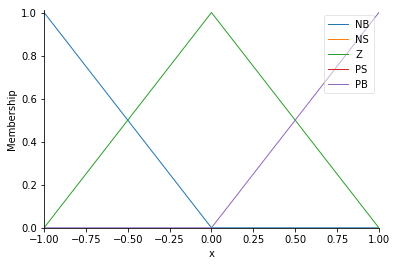

In [59]:
x.view()

In [60]:
y['Z'] = fuzz.trimf(y.universe,[0,0,6])
y['PS'] = fuzz.trimf(y.universe,[0,6,12])
y['PB'] = fuzz.trimf(y.universe,[6,12,12])


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


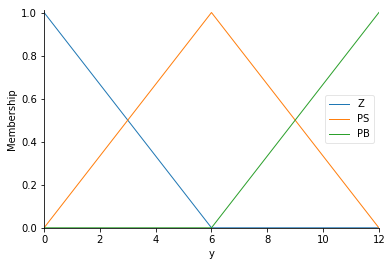

In [61]:
y.view()

In [62]:
#1. IF x = zero, THEN y = zero.
rule1 = ctrl.Rule(x['Z'] , y['Z'])
#2. IF x = NS or PS, THEN y = PS.
rule2 = ctrl.Rule((x['NS']|x['PS']), y['PS'])
#3. IF x = NB or PB, THEN y = PB.
rule3 = ctrl.Rule((x['NB'] | x['PB']), y['PB'])

In [63]:
modelo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [64]:
modelo = ctrl.ControlSystemSimulation(modelo_ctrl)


In [65]:
modelo.input['x'] = -0.6
# Crunch the numbers
modelo.compute()

6.60540540541


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


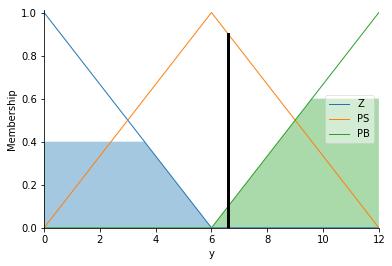

In [66]:
print (modelo.output['y'])
y.view(sim=modelo)

6.60540540541


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


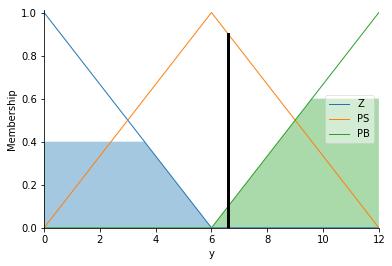

In [67]:
modelo.input['x'] = 0.6
# Crunch the numbers
modelo.compute()
print (modelo.output['y'])
y.view(sim=modelo)

4.75492957746


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


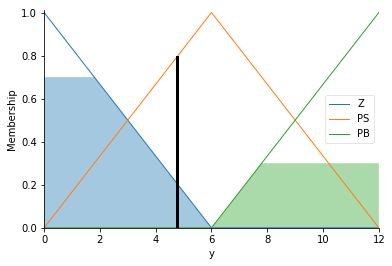

In [68]:
modelo.input['x']= -0.3
modelo.compute()
print (modelo.output['y'])
y.view(sim=modelo)

4.75492957746


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


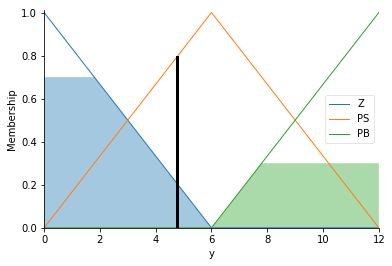

In [69]:
modelo.input['x']= 0.3
modelo.compute()
print (modelo.output['y'])
y.view(sim=modelo)

2.0


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


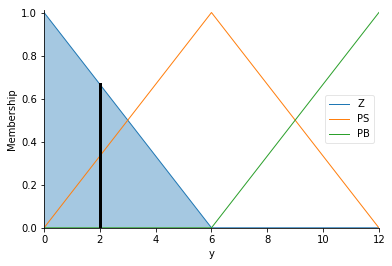

In [70]:
modelo.input['x']= 0.0
modelo.compute()
print (modelo.output['y'])
y.view(sim=modelo)

In [71]:
saida = list() #guardar os valores do sistema
for k in x.universe:
    modelo.input['x'] = k
    modelo.compute()
    saida.append(modelo.output['y'])
saida = np.asarray(saida)


In [72]:
x.universe

array([-1,  0,  1])

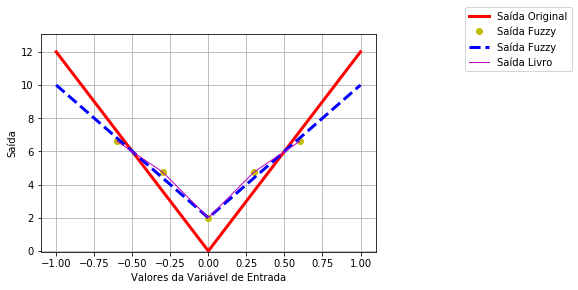

In [74]:
X = (-1,-0.5,0,0.5,1)
S =  12*np.abs(X)
fx = [-0.6,-0.3,0,0.3,0.6]
fy = [6.60540540541,4.75492957746,2.0,4.75492957746,6.60540540541]

fig,ax = plt.subplots()
ax.plot(X,S,'r-',linewidth=3,label= 'Saída Original')
ax.plot(fx,fy,'yo',linewidth=8,label= 'Saída Fuzzy')
ax.plot(x.universe,saida,'b--',linewidth=3,label= 'Saída Fuzzy')
ax.plot(fx,fy,'m-',linewidth=1,label= 'Saída Livro')



#ax.plot(x1.universe,saidaReal,'g-',linewidth=3,label= 'Saída Sistema')
ax.set_ylabel('Saída')
ax.set_xlabel('Valores da Variável de Entrada')
ax.set_ylim(-0.05, 13.05);
ax.grid(True)
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()



# Exemplo 8.4

<img src="Images/exem8141.png">

<img src="Images/exem8142.png">

<img src="Images/exem8143.png">

In [85]:
x1 = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'x1')
y = ctrl.Consequent(np.arange(9950, 10347, 1), 'y')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


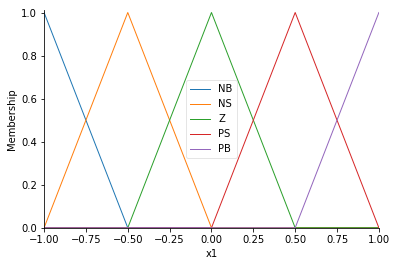

In [86]:
rotulosX = ['NB', 'NS', 'Z', 'PS', 'PB']
x1.automf(names=rotulosX)
x1.view()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


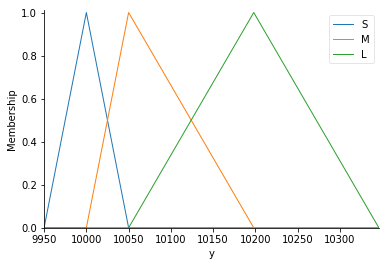

In [87]:
y['S'] = fuzz.trimf(y.universe,[9950,10000,10050])
y['M'] = fuzz.trimf(y.universe,[10000,10050,10198])
y['L'] = fuzz.trimf(y.universe,[10050,10198,10346])
y.view()

In [88]:
#1. IF x = zero, THEN y = S.
rule1 = ctrl.Rule(x1['Z'] , y['S'])
#2. IF x = NS or PS, THEN y = M.
rule2 = ctrl.Rule((x1['NS']|x1['PS']), y['M'])
#3. IF x = NB or PB, THEN y = L.
rule3 = ctrl.Rule((x1['NB'] | x1['PB']), y['L'])

In [89]:
modelo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [90]:
modelo = ctrl.ControlSystemSimulation(modelo_ctrl)


In [91]:
Vx1 = [-1.0,-0.5,0,0.5,1.0]
rx1 = [10198, 10050, 10000, 10050, 10198]
saida = list() #guardar os valores do sistema

for k in Vx1:
    modelo.input['x1'] = k
    modelo.compute()
    saida.append(modelo.output['y'])
saida = np.asarray(saida)   

In [107]:
saida2 = list()
for k2 in x1.universe:
    modelo.input['x1'] = k2
    modelo.compute()
    saida2.append(modelo.output['y'])
saida2 = np.asarray(saida2)   
    

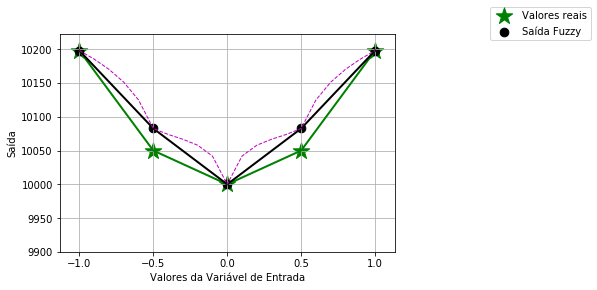

In [109]:
fig,ax = plt.subplots()
ax.scatter(Vx1,rx1,s=300, marker='*', c='g',label='Valores reais')
ax.scatter(Vx1,saida,s=300, marker='.', c='k',label='Saída Fuzzy')
ax.plot(Vx1,rx1,'g-',linewidth=2)
ax.plot(Vx1,saida,'k-',linewidth=2)
ax.plot(x1.universe,saida2,'m--',linewidth=1)



#ax.plot(x1.universe,saidaReal,'g-',linewidth=3,label= 'Saída Sistema')
ax.set_ylabel('Saída')
ax.set_xlabel('Valores da Variável de Entrada')
ax.set_ylim(9900.05, 10222.05);
ax.grid(True)
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

